# Assignment 11

## Eren Akgunduz

### Deep Learning &mdash; 20 April 2024

### [Link to notebook](https://colab.research.google.com/drive/1dJV0F8oki2rWWcpvoXJBUiVxyBBCEeha)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.datasets import cifar10
from keras.models import Sequential, load_model
from keras.regularizers import l2
from keras.layers import Dense, Conv2D, Flatten, Dropout, Activation, MaxPooling2D
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

### Helper functions

In [2]:
def img_plt(images, labels):
    plt.figure()
    for i in range(1, 11):
        plt.subplot(2, 5, i)
        plt.imshow(images[i-1,:,:])
        plt.title(f"Label: {str(labels[i-1])}")
    plt.show()

In [3]:
def feat_plot(features, labels, classes):
    for class_i in classes:
        plt.plot(features[labels[:]==classes[class_i],0], features[labels[:]==classes[class_i],1], 'o', markersize=15)

    plt.xlabel('x: feature 1')
    plt.ylabel('y: feature 2')
    plt.legend(['Class' + str(classes[class_i]) for class_i in classes])
    plt.show()

In [4]:
def acc_fun(labels_actual, labels_pred):
    acc = np.sum(labels_actual==labels_pred)/len(labels_actual) * 100
    return acc

In [5]:
def plot_curve(accuracy_train, loss_train, accuracy_val, loss_val):
    epochs = np.arange(loss_train.shape[0])
    plt.subplot(1,2,1)
    plt.plot(epochs, accuracy_train, epochs, accuracy_val)
    plt.xlabel('Epoch #')
    plt.ylabel('Accuracy')
    plt.title('Accuracy')
    plt.legend(['Training', 'Validation'])

    plt.subplot (1,2,2)
    plt.plot(epochs, loss_train, epochs, loss_val)
    plt.xlabel('Epoch #')
    plt.ylabel('Binary crossentropy loss')
    plt.title('Loss')
    plt.legend(['Training', 'Validation'])
    plt.show()

### Dataset

In [6]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [7]:
classes = np.arange(10)
print(x_train.shape)

(50000, 32, 32, 3)


In [8]:
# Selecting 20% of training data as the validation set
num_train_img=x_train.shape[0]
train_ind=np.arange(0,num_train_img)
train_ind_s=np.random.permutation(train_ind)
x_train=x_train[train_ind_s,:,:,:]
y_train=y_train[train_ind_s]
# Selecting 20% of training images for validation
x_val=x_train[0:int(0.2*num_train_img),:,:,:]
y_val=y_train[0:int(0.2*num_train_img)]
# The rest of the training set
x_train=x_train[int(0.2*num_train_img):,:,:]
y_train=y_train[int(0.2*num_train_img):]

### Preprocessing

In [9]:
# Scaling the images
x_train=x_train.astype('float32')
x_val=x_val.astype('float32')
x_test=x_test.astype('float32')
x_train /= 255
x_val /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train_c = to_categorical(y_train, len(classes))
y_val_c = to_categorical(y_val, len(classes))
y_test_c = to_categorical(y_test, len(classes))

### Model

In [10]:
model_a = Sequential()
model_a.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model_a.add(Activation('relu'))
model_a.add(Conv2D(32, (3, 3), padding='same'))
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size=(2, 2)))

model_a.add(Conv2D(64, (3, 3), padding='same'))
model_a.add(Activation('relu'))
model_a.add(Conv2D(64, (3, 3), padding='same'))
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size=(2, 2)))

model_a.add(Flatten())
model_a.add(Dense(units=512, activation='relu'))
model_a.add(Dropout(0.5))
model_a.add(Dense(units=len(classes), activation='softmax'))
model_a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                        

In [11]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_a.compile(optimizer=opt,
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [12]:
# Creating a checkpoint to save the best model based on the lowest validation loss.
save_path='/content/drive/My Drive/model_a_cifar10.h5'
callbacks_save=ModelCheckpoint(save_path, monitor='val_loss', verbose=0, save_best_only=True, period=1)

history=model_a.fit(x_train, y_train_c,
                    batch_size=32,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_val, y_val_c),
                    callbacks=[callbacks_save])

Epoch 1/50
1250/1250 [==============================] - 23s 10ms/step - loss: 1.4961 - accuracy: 0.4559 - val_loss: 1.0912 - val_accuracy: 0.6080
Epoch 2/50
  12/1250 [..............................] - ETA: 6s - loss: 1.1437 - accuracy: 0.6016 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 8s 6ms/step - loss: 1.0301 - accuracy: 0.6339 - val_loss: 0.9334 - val_accuracy: 0.6714
Epoch 3/50
1250/1250 [==============================] - 8s 7ms/step - loss: 0.8358 - accuracy: 0.7078 - val_loss: 0.7672 - val_accuracy: 0.7328
Epoch 4/50
1250/1250 [==============================] - 8s 7ms/step - loss: 0.7037 - accuracy: 0.7551 - val_loss: 0.7373 - val_accuracy: 0.7445
Epoch 5/50
1250/1250 [==============================] - 7s 6ms/step - loss: 0.5956 - accuracy: 0.7916 - val_loss: 0.7653 - val_accuracy: 0.7455
Epoch 6/50
1250/1250 [==============================] - 8s 6ms/step - loss: 0.5087 - accuracy: 0.8220 - val_loss: 0.7413 - val_accuracy: 0.7567
Epoch 7/50
1250/1250 [==============================] - 8s 6ms/step - loss: 0.4283 - accuracy: 0.8495 - val_loss: 0.7453 - val_accuracy: 0.7612
Epoch 8/50
1250/1250 [==============================] - 7s 6ms/step - loss: 0.3655 - accuracy: 0.8727 - val_loss: 0.8016 - val_accuracy: 0.7618
Epo

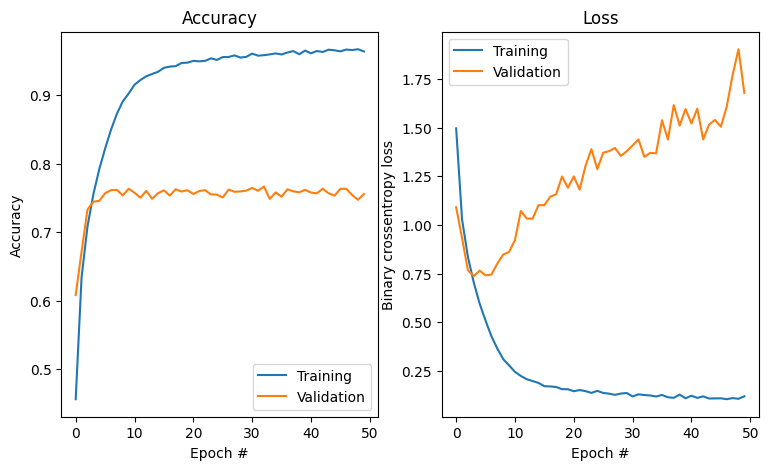

In [13]:
plt.figure(figsize=[9, 5])
acc_curve_train = np.array(history.history['accuracy'])
loss_curve_train = np.array(history.history['loss'])
acc_curve_val = np.array(history.history['val_accuracy'])
loss_curve_val = np.array(history.history['val_loss'])
plot_curve(acc_curve_train, loss_curve_train, acc_curve_val, loss_curve_val)

### Scores

In [14]:
# Loading the best model - saved based on the lowest validation loss
model_a = load_model(save_path)

In [15]:
# Evaluating the model on the training samples
score = model_a.evaluate(x_train, y_train_c)
print(f"Total loss on training set: {score[0]}")
print(f"Accuracy of training set: {score[1]}")

1250/1250 [==============================] - 4s 3ms/step - loss: 0.5000 - accuracy: 0.8353
Total loss on training set: 0.5000460147857666
Accuracy of training set: 0.8352749943733215


In [16]:
# Evaluating the model on the validation samples
score = model_a.evaluate(x_val, y_val_c)
print(f"Total loss on validation set: {score[0]}")
print(f"Accuracy of validation set: {score[1]}")

313/313 [==============================] - 1s 3ms/step - loss: 0.7373 - accuracy: 0.7445
Total loss on validation set: 0.737325131893158
Accuracy of validation set: 0.7444999814033508


In [17]:
# Evaluating the model on the held out samples
score = model_a.evaluate(x_test, y_test_c)
print(f"Total loss on testing set: {score[0]}")
print(f"Accuracy of testing set: {score[1]}")

313/313 [==============================] - 1s 4ms/step - loss: 0.7370 - accuracy: 0.7456
Total loss on testing set: 0.7370343208312988
Accuracy of testing set: 0.7455999851226807
